# AUTHOR : RAJIL JAIN

# GRIP@The Sparks Foundation

## Task - 2

# Prediction using Unsupervised Machine Learning

In this task I tried to predict the optimum number of clusters and represent it visually for betterment of understanding

and we will be on Iris dataset from sklearn library and performing Kmeans clustering.


*Dataset Variables*

• **Sepal_length** : Shows the length of sepal

• **Sepal_width** : Shows the width of sepal

• **Petal_length** : Shows the length of petal

• **Petal_width** : Shows the width of petal

• **Species** : Shows the species of iris


Language : Python

IDE : Jupyter Notebook

In [161]:
#importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets


In [162]:
#Loading the Iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(20)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [163]:
iris_df.shape


(150, 4)

From above we can see that our dataset contains 150 rows and 4 columns .

### *Columns* 

In [164]:
iris_df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### *Description of Dataset*  

In [165]:
iris_df.info


<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [166]:
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### *Finding any null values*

In [167]:
null = iris_df.isnull()
print(null)
null_count = null.count()
null_count


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                False             False              False             False
1                False             False              False             False
2                False             False              False             False
3                False             False              False             False
4                False             False              False             False
..                 ...               ...                ...               ...
145              False             False              False             False
146              False             False              False             False
147              False             False              False             False
148              False             False              False             False
149              False             False              False             False

[150 rows x 4 columns]


sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

From above snippet, we can find out that there is 'NO' null values in the iris dataset by using isnull function also shown divided number of atributes in four columns.  

## Data Visualisation

*1. Sepal_length VS petal_length*

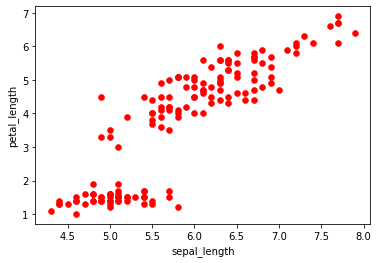

In [168]:
x=iris_df.iloc[:,0]
y=iris_df.iloc[:,2]
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.scatter(x,y,color='red',linewidths=0.5)
plt.show()

*2. Sepal_width VS petal_width*

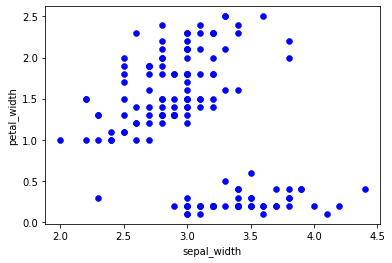

In [169]:
x=iris_df.iloc[:,1]
y=iris_df.iloc[:,3]
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.scatter(x,y,color='blue',linewidths=0.5)
plt.show()

*3. Sepal_length VS sepal_width*

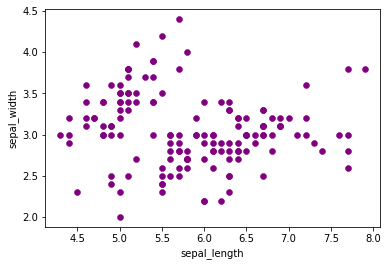

In [173]:
x=iris_df.iloc[:,0]
y=iris_df.iloc[:,1]
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(x, y, color='purple',linewidths=0.5)
plt.show()

*4. petal_length VS petal_width*

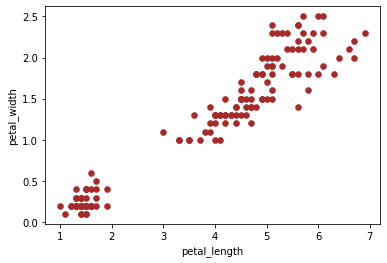

In [174]:
x=iris_df.iloc[:,2]
y=iris_df.iloc[:,3]
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(x, y, color='brown',linewidths=0.5)
plt.show()

## *As we have our classified data,* 
## *Now we have to find the optimum number of clusters for k-means classification*

In [175]:
#cluster classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)


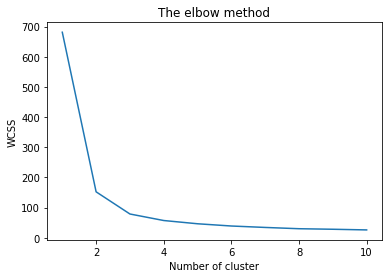

In [177]:
#plotting the result onto a line graph, allowing us to observe the elbow .

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS') 
plt.show()

WCSS : Within cluster sum of squares

We can clearly see why it is called'The Elbow Method' fron above graph, the optimum cluster is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 

From this we choose the number of cluster as **3'**'.

In [178]:
#Applying Kmeans to the dataset / creating the Kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x) 


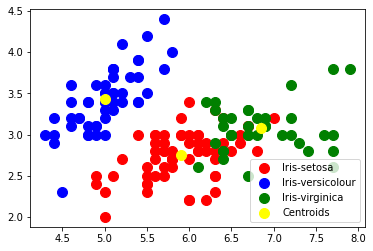

In [181]:
#Visualising the cluster - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Conclusion

We finally caried out our prediction of unsupervised ML for finding optimum number of cluster for K Means,and performed various operation on model.

Thank You